In [1]:
# 변수의 shape, type, value 확인
def p(var,_name="") :
    if _name != "" : print(f'<<{_name}>>')
    if type(var)!=type([]):
        try:
            print(f'Shape:{var.shape}')
        except :
            pass
    print(f'Type: {type(var)}')
    print(f'Values: {var}')

def pst(_x,_name=""):
    print(f'<<{_name}>> Shape{_x.shape}, {type(_x)}')
def ps(_x,_name=""):
    print(f'<<{_name}>> Shape{_x.shape}')

## RNN Model Design (MNIST-RNN)

### **Import Module**

In [2]:
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 3.5]
plt.rcParams["font.size"] = "8"

keras.__version__

'3.8.0'

### **DataSet**

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0   # (0~1)<-(0~255)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
ps(x_test[0:3]),ps(y_test[0:3])

<<>> Shape(3, 28, 28)
<<>> Shape(3,)


(None, None)

### **Model-1** : Basic Model

In [5]:
# 주요 변수 정의
features = 28   #pixels
time_steps = 28 #lines
in_dense = 64     # 임의 값
lstm_units = 16 # 임의 값
out_dense = 10    # 출력은 숫자(0~9) 확률

Model: "Basic-RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed                │ (None, 28, 64)         │         1,856 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 16)             │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,210 (28.16 KB)

 Trainable params: 7,210 (28.16 KB)

 Non-trainable params: 0 (0.00 B)

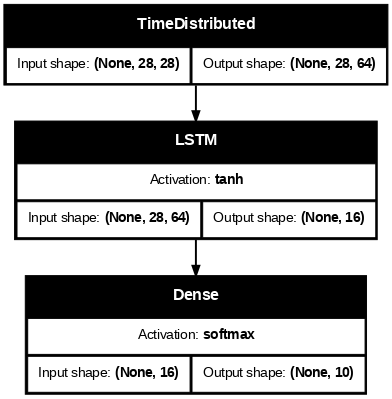

In [6]:
def model_1():
    return keras.models.Sequential([
          keras.Input(shape=(time_steps, features)),
          layers.TimeDistributed(layers.Dense(in_dense)),
          layers.LSTM(lstm_units),         # LSTM
          layers.Dense(out_dense, activation='softmax')
    ],name="Basic-RNN")

model = model_1() # Model Instance

model.summary()
keras.utils.plot_model(model,show_shapes=True,show_layer_activations=True,dpi=70)

In [7]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
%%time
batch_size = 512
history_1 = model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          batch_size=batch_size,
          epochs=30)
# Wall time: 28.2 s

Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.2559 - loss: 2.1298 - val_accuracy: 0.5422 - val_loss: 1.4470
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6223 - loss: 1.2458 - val_accuracy: 0.7515 - val_loss: 0.8365
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7779 - loss: 0.7617 - val_accuracy: 0.8229 - val_loss: 0.6035
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8304 - loss: 0.5808 - val_accuracy: 0.8561 - val_loss: 0.4972
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8638 - loss: 0.4723 - val_accuracy: 0.8786 - val_loss: 0.4286
Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8795 - loss: 0.4131 - val_accuracy: 0.8945 - val_loss: 0.3752
Epoch 7/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8966 - loss: 0.3590 - val_accuracy: 0.8994 - val_loss: 0.3570
Epoch 8/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9052 - loss: 0.3244 - val_accuracy: 0

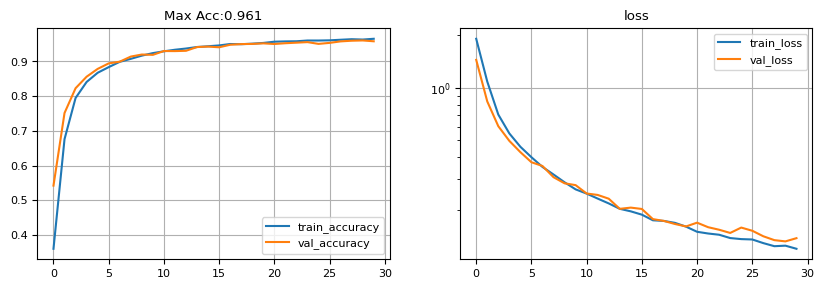

In [9]:
history = history_1.history

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.title(f"Max Acc:{np.max(history['val_accuracy']):.3f}")
plt.plot(history['accuracy'], label='train_accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
#plt.ylim(0.1, 1)
#plt.semilogy()
plt.legend()
plt.grid()

plt.subplot(122)
plt.title("loss")
plt.plot(history['loss'], label='train_loss')
plt.plot(history['val_loss'], label='val_loss')
plt.semilogy()
plt.legend()
plt.grid()
plt.show()

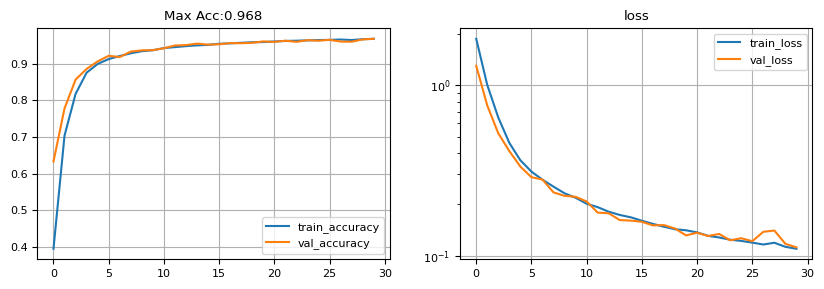

### **Model-2** : Bidirectional Model

Model: "Bidirectional-RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_1              │ (None, 28, 64)         │         1,856 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 32)             │        10,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,554 (49.04 KB)

 Trainable params: 12,554 (49.04 KB)

 Non-trainable params: 0 (0.00 B)

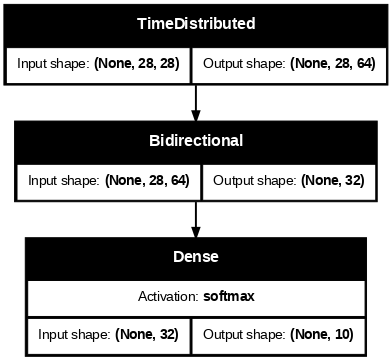

In [10]:
## Model-2 설계 : Bidirectional 추가
def model_2():
    model = keras.models.Sequential(name="Bidirectional-RNN")
    model.add(keras.Input(shape=(time_steps, features)))
    model.add(layers.TimeDistributed(layers.Dense(in_dense)))
    model.add(layers.Bidirectional(layers.LSTM(lstm_units))) # LSTM
    model.add(layers.Dense(out_dense, activation='softmax'))
    return model

model = model_2()
model.summary()
keras.utils.plot_model(model,show_shapes=True,show_layer_activations=True,dpi=70)

#### Fit

In [11]:
# model_Bi : bi-RNN
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
%%time
batch_size = 512
history_2 = model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          batch_size=batch_size,
          epochs=30)
# Wall time: 42.7 s

Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.3052 - loss: 2.0634 - val_accuracy: 0.6965 - val_loss: 1.0704
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7547 - loss: 0.8700 - val_accuracy: 0.8660 - val_loss: 0.4876
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8792 - loss: 0.4364 - val_accuracy: 0.9088 - val_loss: 0.3257
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9143 - loss: 0.3076 - val_accuracy: 0.9252 - val_loss: 0.2531
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9293 - loss: 0.2487 - val_accuracy: 0.9342 - val_loss: 0.2236
Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9384 - loss: 0.2151 - val_accuracy: 0.9444 - val_loss: 0.1874
Epoch 7/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9480 - loss: 0.1830 - val_accuracy: 0.9506 - val_loss: 0.1669
Epoch 8/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9506 - loss: 0.1686 - val_accu

#### Plot

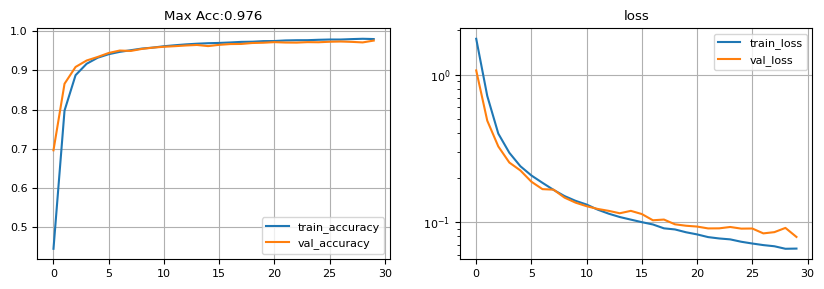

In [13]:
history = history_2.history

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.title(f"Max Acc:{np.max(history['val_accuracy']):.3f}")
plt.plot(history['accuracy'], label='train_accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
#plt.ylim(0.1, 1)
#plt.semilogy()
plt.legend()
plt.grid()

plt.subplot(122)
plt.title("loss")
plt.plot(history['loss'], label='train_loss')
plt.plot(history['val_loss'], label='val_loss')
plt.semilogy()
plt.legend()
plt.grid()
plt.show()

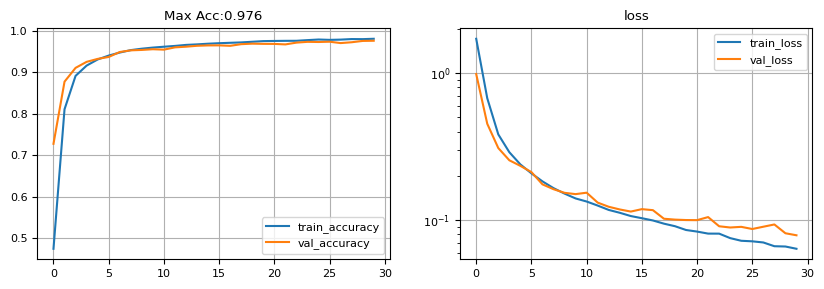

- 두모델의 성능 비교

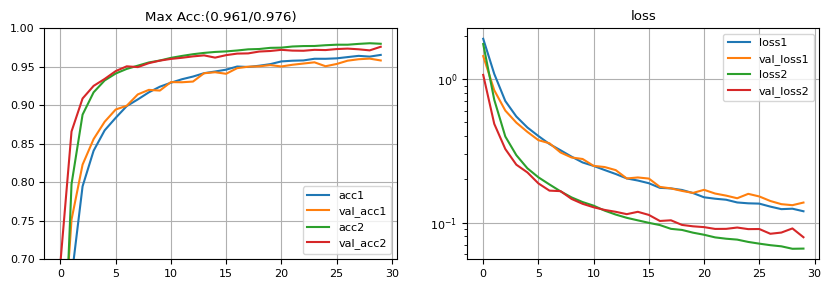

In [14]:
history = history_1.history
history2 = history_2.history

max1 = np.max(history['val_accuracy'])
max2 = np.max(history2['val_accuracy'])

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.title(f"Max Acc:({max1:.3f}/{max2:.3f})")
plt.plot(history['accuracy'], label='acc1')
plt.plot(history['val_accuracy'], label='val_acc1')
plt.plot(history2['accuracy'], label='acc2')
plt.plot(history2['val_accuracy'], label='val_acc2')
plt.ylim(0.7, 1)
#plt.semilogy()
plt.legend()
plt.grid()

plt.subplot(122)
plt.title("loss")
plt.plot(history['loss'], label='loss1')
plt.plot(history['val_loss'], label='val_loss1')
plt.plot(history2['loss'], label='loss2')
plt.plot(history2['val_loss'], label='val_loss2')
plt.semilogy()
plt.legend()
plt.grid()
plt.show()

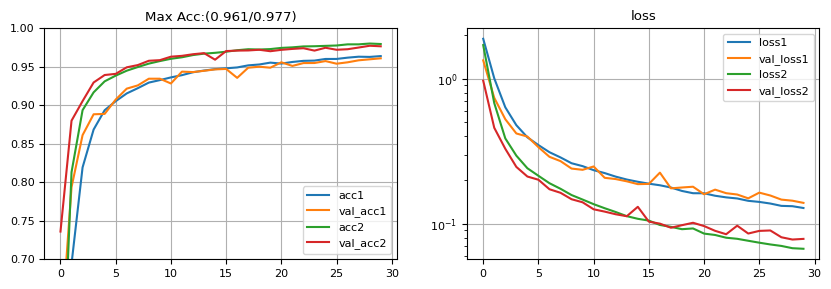

### Model-3 : Hierachical RNN model**


#### Model Define

Model: "Basic-RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_2              │ (None, 28, 50)         │        10,400 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 16)             │         4,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,858 (58.04 KB)

 Trainable params: 14,858 (58.04 KB)

 Non-trainable params: 0 (0.00 B)

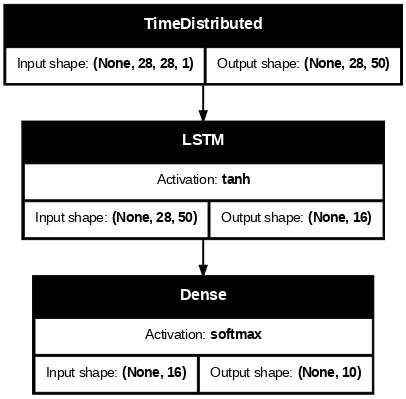

In [15]:
# 주요 변수 정의
pixel = 1        ## features
pixels = 28         ## pixels
lines = 28         ## lines
lstm1_units = 50 # 8 임의 값
lstm2_units = 16 # 임의 값
out_dense = 10   # 출력은 숫자(0~9) 확률

def model_3():
    model = keras.models.Sequential(name="Basic-RNN")
    model.add(keras.Input(shape=(lines, pixels, pixel)))
    model.add(layers.TimeDistributed(layers.LSTM(lstm1_units)))
    model.add(layers.LSTM(lstm2_units))
    model.add(layers.Dense(out_dense, activation='softmax'))
    return model

model = model_3() # Model Instance

model.summary()
keras.utils.plot_model(model,show_shapes=True,show_layer_activations=True,dpi=70)

#### Fit

In [16]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
# Reshapes data to 4D for Hierarchical RNN.
x_train = x_train.reshape(-1, 28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print('x_train shape:', x_train.shape)

x_train shape: (60000, 28, 28, 1)


In [18]:
ps(x_train),ps(y_train)
lines, pixels, pixel

<<>> Shape(60000, 28, 28, 1)
<<>> Shape(60000,)


(28, 28, 1)

In [19]:
%%time
epochs = 30
batch_size = 512
history_3 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    validation_data=(x_test, y_test),
                    epochs=epochs)
# Wall time: 3min 19s

Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 75ms/step - accuracy: 0.2254 - loss: 2.1891 - val_accuracy: 0.4484 - val_loss: 1.6071
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.5341 - loss: 1.3929 - val_accuracy: 0.6884 - val_loss: 0.9026
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.7041 - loss: 0.8613 - val_accuracy: 0.8104 - val_loss: 0.5994
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.8265 - loss: 0.5619 - val_accuracy: 0.8724 - val_loss: 0.4441
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.8731 - loss: 0.4363 - val_accuracy: 0.8970 - val_loss: 0.3731
Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.8974 - loss: 0.3637 - val_accuracy: 0.9093 - val_loss: 0.3141
Epoch 7/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.9135 - loss: 0.3055 - val_accuracy: 0.9273 - val_loss: 0.2610
Epoch 8/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.9222 - loss: 0.2787 - val_acc

Wall time: 3min 19s


#### **Analysis**

##### Plot

# 새 섹션

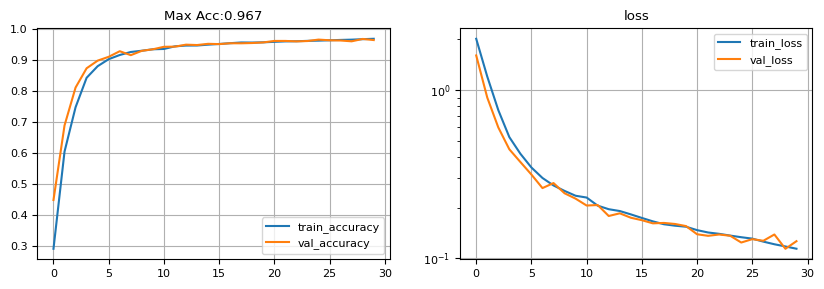

In [20]:
history = history_3.history

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.title(f"Max Acc:{np.max(history['val_accuracy']):.3f}")
plt.plot(history['accuracy'], label='train_accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
#plt.ylim(0.1, 1)
#plt.semilogy()
plt.legend()
plt.grid()

plt.subplot(122)
plt.title("loss")
plt.plot(history['loss'], label='train_loss')
plt.plot(history['val_loss'], label='val_loss')
plt.semilogy()
plt.legend()
plt.grid()
plt.show()

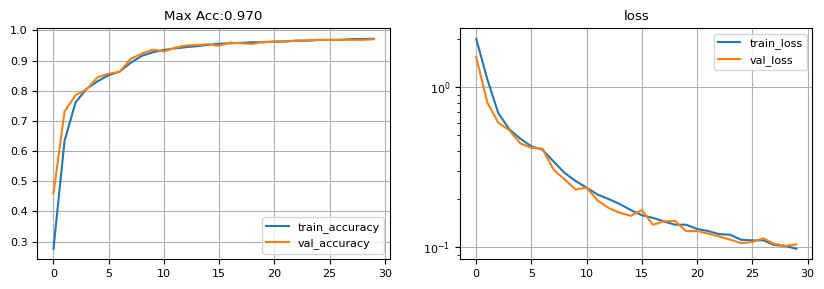

# 실습 과제

## Model-3에서 LSTM layer 간에 unit의 비율을 조정해서 성능 차이를 확인해 보자

## 최적의 조합이 있다면 그 이유는?

In [21]:
# 주요 변수 정의
pixel = 1        ## features
pixels = 28         ## pixels
lines = 28         ## lines

lstm1_units = 16 # 임의 값
lstm2_units = 50 # 임의 값
out_dense = 10   # 출력은 숫자(0~9) 확률

def model_3():
    model = keras.models.Sequential(name="Basic-RNN")
    model.add(keras.Input(shape=(lines, pixels, pixel)))
    model.add(layers.TimeDistributed(layers.LSTM(lstm1_units)))
    model.add(layers.LSTM(lstm2_units))
    model.add(layers.Dense(out_dense, activation='softmax'))
    return model

model = model_3() # Model Instance

model.summary()
keras.utils.plot_model(model,show_shapes=True,show_layer_activations=True,dpi=70)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10,
                    batch_size=128)

Model: "Basic-RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_3              │ (None, 28, 16)         │         1,152 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        13,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,062 (58.84 KB)

 Trainable params: 15,062 (58.84 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 55ms/step - accuracy: 0.3148 - loss: 1.8691 - val_accuracy: 0.7647 - val_loss: 0.6803
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.8044 - loss: 0.5774 - val_accuracy: 0.8981 - val_loss: 0.3122
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9210 - loss: 0.2594 - val_accuracy: 0.9455 - val_loss: 0.1814
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9469 - loss: 0.1740 - val_accuracy: 0.9590 - val_loss: 0.1308
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9559 - loss: 0.1431 - val_accuracy: 0.9630 - val_loss: 0.1170
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9639 - loss: 0.1189 - val_accuracy: 0.9652 - val_loss: 0.1109
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9666 - loss: 0.1065 - val_accuracy: 0.9729 - val_loss: 0.0864
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9695 - loss: 0.0976 - 

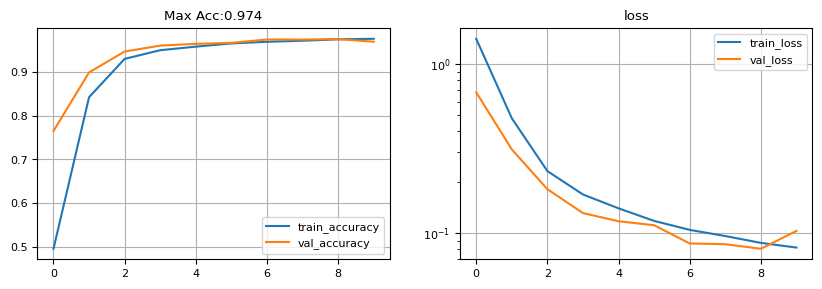

In [24]:
history = history.history

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.title(f"Max Acc:{np.max(history['val_accuracy']):.3f}")
plt.plot(history['accuracy'], label='train_accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
#plt.ylim(0.1, 1)
#plt.semilogy()
plt.legend()
plt.grid()

plt.subplot(122)
plt.title("loss")
plt.plot(history['loss'], label='train_loss')
plt.plot(history['val_loss'], label='val_loss')
plt.semilogy()
plt.legend()
plt.grid()
plt.show()

In [25]:
# 주요 변수 정의
pixel = 1        ## features
pixels = 28         ## pixels
lines = 28         ## lines

lstm1_units = 33 # 임의 값
lstm2_units = 33 # 임의 값
out_dense = 10   # 출력은 숫자(0~9) 확률

def model_3():
    model = keras.models.Sequential(name="Basic-RNN")
    model.add(keras.Input(shape=(lines, pixels, pixel)))
    model.add(layers.TimeDistributed(layers.LSTM(lstm1_units)))
    model.add(layers.LSTM(lstm2_units))
    model.add(layers.Dense(out_dense, activation='softmax'))
    return model

model = model_3() # Model Instance

model.summary()
keras.utils.plot_model(model,show_shapes=True,show_layer_activations=True,dpi=70)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10,
                    batch_size=128)

Model: "Basic-RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_4              │ (None, 28, 33)         │         4,620 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 33)             │         8,844 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           340 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,804 (53.92 KB)

 Trainable params: 13,804 (53.92 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 51ms/step - accuracy: 0.4109 - loss: 1.6465 - val_accuracy: 0.7818 - val_loss: 0.6357
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.8243 - loss: 0.5391 - val_accuracy: 0.8819 - val_loss: 0.3699
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.8915 - loss: 0.3476 - val_accuracy: 0.9134 - val_loss: 0.2791
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9188 - loss: 0.2642 - val_accuracy: 0.9396 - val_loss: 0.1923
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9397 - loss: 0.1995 - val_accuracy: 0.9510 - val_loss: 0.1638
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9528 - loss: 0.1604 - val_accuracy: 0.9613 - val_loss: 0.1255
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9611 - loss: 0.1313 - val_accuracy: 0.9647 - val_loss: 0.1157
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9660 - loss: 0.1154 - 

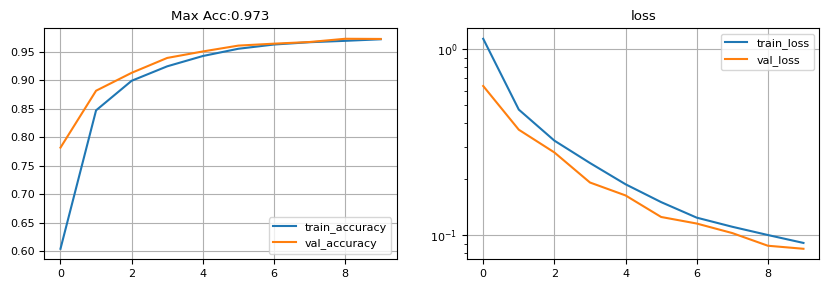

In [26]:
history = history.history

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.title(f"Max Acc:{np.max(history['val_accuracy']):.3f}")
plt.plot(history['accuracy'], label='train_accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
#plt.ylim(0.1, 1)
#plt.semilogy()
plt.legend()
plt.grid()

plt.subplot(122)
plt.title("loss")
plt.plot(history['loss'], label='train_loss')
plt.plot(history['val_loss'], label='val_loss')
plt.semilogy()
plt.legend()
plt.grid()
plt.show()

- mnist 는 2d image 이기 때문에 x, y 방향 정보를 모두 동등한 수준으로 학습하는 것이 안정적이다.

# 실습 과제

## 앞에서 수정한 모델에 Bidirectional로 수정해 보자 성능이 개선되었는가?
## 이유를 검증해 보자

In [30]:
# 주요 변수 정의
pixel = 1        ## features
pixels = 28         ## pixels
lines = 28         ## lines

lstm1_units = 33 # 임의 값
lstm2_units = 33 # 임의 값
out_dense = 10   # 출력은 숫자(0~9) 확률

def model_3():
    model = keras.models.Sequential(name="Basic-RNN")
    model.add(keras.Input(shape=(lines, pixels, pixel)))
    model.add(layers.TimeDistributed(layers.LSTM(lstm1_units)))
    model.add(layers.Bidirectional(layers.LSTM(lstm2_units)))
    model.add(layers.Dense(out_dense, activation='softmax'))
    return model

model = model_3() # Model Instance

model.summary()
keras.utils.plot_model(model,show_shapes=True,show_layer_activations=True,dpi=70)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10,
                    batch_size=128)

Model: "Basic-RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_8              │ (None, 28, 33)         │         4,620 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 66)             │        17,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           670 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,978 (89.76 KB)

 Trainable params: 22,978 (89.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 53ms/step - accuracy: 0.4692 - loss: 1.5178 - val_accuracy: 0.8773 - val_loss: 0.3796
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.8948 - loss: 0.3319 - val_accuracy: 0.9375 - val_loss: 0.2035
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.9380 - loss: 0.1971 - val_accuracy: 0.9492 - val_loss: 0.1607
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.9571 - loss: 0.1394 - val_accuracy: 0.9651 - val_loss: 0.1115
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.9660 - loss: 0.1107 - val_accuracy: 0.9607 - val_loss: 0.1289
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.9703 - loss: 0.0958 - val_accuracy: 0.9704 - val_loss: 0.0953
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.9748 - loss: 0.0828 - val_accuracy: 0.9711 - val_loss: 0.0887
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.9763 - loss: 0.0766 - 

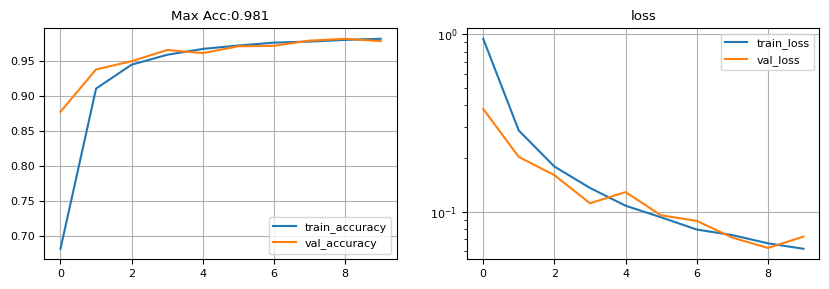

In [31]:
history = history.history

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.title(f"Max Acc:{np.max(history['val_accuracy']):.3f}")
plt.plot(history['accuracy'], label='train_accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
#plt.ylim(0.1, 1)
#plt.semilogy()
plt.legend()
plt.grid()

plt.subplot(122)
plt.title("loss")
plt.plot(history['loss'], label='train_loss')
plt.plot(history['val_loss'], label='val_loss')
plt.semilogy()
plt.legend()
plt.grid()
plt.show()

- 2d image 이므로 시계열처럼 한방향으로 데이터를 읽는 것 보다 양방향 데이터를 참고할 때 더 많은 정보를 획득할 수 있다.